# Data Analysis

In [1]:
import math
import IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
train_titanic_dataframe = pd.read_csv('train.csv')
test_titanic_dataframe = pd.read_csv('test.csv')

In [4]:
train_titanic_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_titanic_dataframe.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

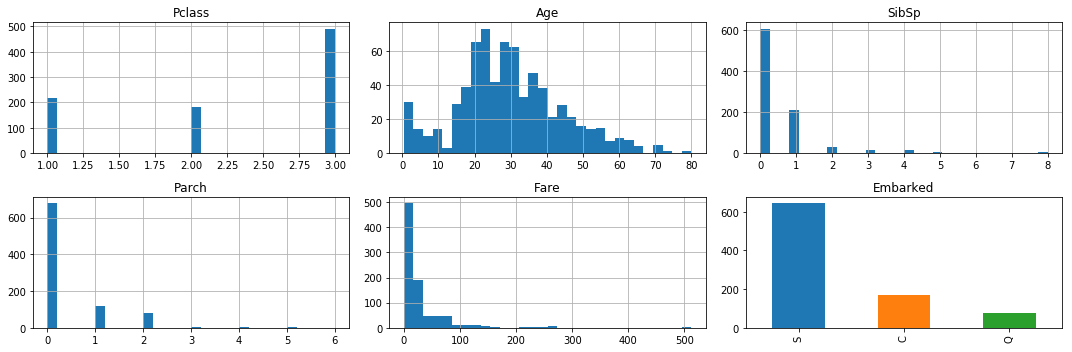

In [6]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
train_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
train_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
train_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
train_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
train_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.subplot(2, 3, 6)
plt.title('Embarked')
train_titanic_dataframe['Embarked'].value_counts().plot(kind='bar')

plt.tight_layout()

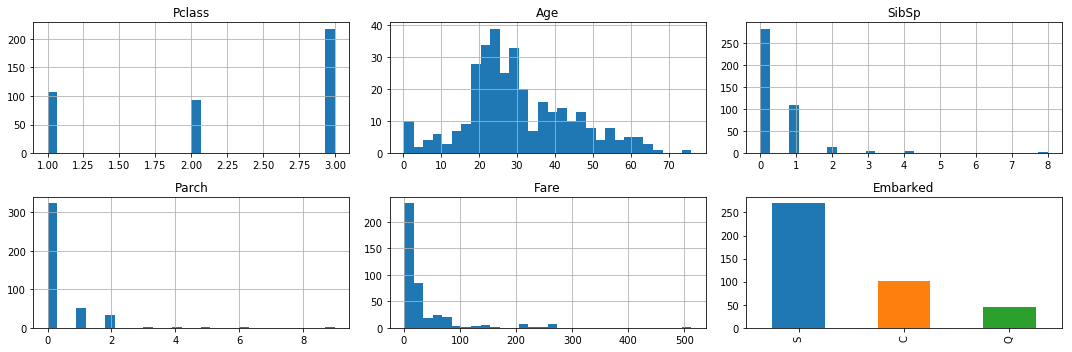

In [7]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
test_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
test_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
test_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
test_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
test_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.subplot(2, 3, 6)
plt.title('Embarked')
test_titanic_dataframe['Embarked'].value_counts().plot(kind='bar')
plt.tight_layout()

# Data Preprocessing

In [8]:
from sklearn import preprocessing

Age is not good because the test data does not have null for age

In [9]:
total_titanic_dataframe = pd.concat([train_titanic_dataframe, test_titanic_dataframe], axis=0)

median_age = total_titanic_dataframe['Age'].median()
titles = ['Mr', 'Mrs', 'Miss', 'Master', 
          'Don', 'Rev', 'Dr', 'Mme', 'Ms', 
          'Major', 'Mlle', 'Col', 'Capt', 'Jonkheer', 
          'Lady', 'Sir', 'Countess', 'L']
simple_titles = {
    'Mr': ['Mr', 'Sir'], 
    'Mrs': ['Mrs', 'Don', 'Mme', 'Lady', 'Countess'], 
    'Miss': ['Miss', 'Ms', 'Mlle'], 
    'Master': ['Master'], 
    'Others': ['Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer', 'L']
}

median_age_simple_dict = {}
for title in simple_titles:
    median_age_simple_dict[title] = total_titanic_dataframe['Age'].loc[total_titanic_dataframe['Name'].str.contains('|'.join([i + '.' for i in simple_titles[title]]))].median()
    
median_sibsp = total_titanic_dataframe['SibSp'].median()
median_parch = total_titanic_dataframe['Parch'].median()
median_fare = total_titanic_dataframe['Fare'].median()

def preprocess_id(titanic_dataframe):
    return titanic_dataframe['PassengerId']

def preprocess_data(titanic_dataframe):
    return preprocess_data_1(titanic_dataframe)

def preprocess_data_1(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    
    new_dataframe['pclass_1'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 1 else 0.0)
    new_dataframe['pclass_2'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 2 else 0.0)
    new_dataframe['pclass_3'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 3 else 0.0)

    new_dataframe['sex_male'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'male' else 0.0)
    new_dataframe['sex_female'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'female' else 0.0)

    for title in median_age_simple_dict:
        titanic_dataframe.loc[titanic_dataframe['Name'].str.contains('|'.join([i + '.' for i in simple_titles[title]])), 'Age'] = titanic_dataframe['Age'].loc[titanic_dataframe['Name'].str.contains('|'.join([i + '.' for i in simple_titles[title]]))].fillna(median_age_simple_dict[title])
        
    age = titanic_dataframe['Age']
    # binning
    # bins = [0, 0.9999, 6, 11, 15, 47, 64, 80]
    bins = [0, 0.9999, 10, 20, 30, 40, 50, 80]
    labels = [i for i in range(len(bins) - 1)]
    age = pd.cut(age, bins=bins, labels=labels)
    for i in labels:
        new_dataframe['age_bin_%d' % i] = age.apply(lambda val: 1.0 if val == i else 0.0)
    
    SibSp = titanic_dataframe['SibSp'].apply(lambda val: val if pd.isna(val) is False else median_sibsp)
    Parch = titanic_dataframe['Parch'].apply(lambda val: val if pd.isna(val) is False else median_parch)

    family_size = SibSp + Parch
    new_dataframe['family_size_bin_0'] = family_size.apply(lambda val: 1.0 if val == 0 else 0.0)
    new_dataframe['family_size_bin_1'] = family_size.apply(lambda val: 1.0 if val >= 1 and val <= 3 else 0.0)
    new_dataframe['family_size_bin_2'] = family_size.apply(lambda val: 1.0 if val >= 4 else 0.0)
    # new_dataframe['family_size_bin_3'] = family_size.apply(lambda val: 1.0 if val == 6 else 0.0)
    
    fare = titanic_dataframe['Fare'].apply(lambda val: val if pd.isna(val) is False else median_fare)

    CABIN_SECTIONS = ['A','B','C','D','E','F','G','T']
    for cabin_section in CABIN_SECTIONS:
        new_dataframe['cabin_section_%s' % cabin_section] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str and val.split(' ')[0][0].lower() == cabin_section.lower() else 0.0)
    # new_dataframe['cabin_unknown'] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) != str else 0.0)
    # new_dataframe['cabin_number'] = titanic_dataframe['Cabin'].apply(lambda val: int(val.split(' ')[0][1:]) if type(val) == str and val.split(' ')[0][1:] != '' else 0)

    new_dataframe['embark_c'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'c' else 0.0)
    new_dataframe['embark_s'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if (type(val) != str) or (type(val) == str and val.lower() == 's') else 0.0)
    new_dataframe['embark_q'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'q' else 0.0)
    
    return new_dataframe

def preprocess_target(titanic_dataframe):
    return titanic_dataframe['Survived']

In [10]:
train_titanic_dataframe_reindexed = train_titanic_dataframe.reindex(np.random.permutation(train_titanic_dataframe.index))

train_titanic_dataframe_id_prep = preprocess_id(train_titanic_dataframe_reindexed)
train_titanic_dataframe_data_prep = preprocess_data(train_titanic_dataframe_reindexed)
train_titanic_dataframe_target_prep = preprocess_target(train_titanic_dataframe_reindexed)

test_titanic_dataframe_id_prep = preprocess_id(test_titanic_dataframe)
test_titanic_dataframe_data_prep = preprocess_data(test_titanic_dataframe)

In [11]:
training_id = train_titanic_dataframe_id_prep.head(700).values.reshape(-1, )
training_data = train_titanic_dataframe_data_prep.head(700).values
training_targets = train_titanic_dataframe_target_prep.head(700).values.reshape(-1, )
training_targets_one_hot = (preprocessing.OneHotEncoder().fit_transform(training_targets.reshape(-1, 1))).toarray()

validation_id = train_titanic_dataframe_id_prep.head(191).values.reshape(-1, )
validation_data = train_titanic_dataframe_data_prep.tail(191).values
validation_targets = train_titanic_dataframe_target_prep.tail(191).values.reshape(-1, )
validation_targets_one_hot = (preprocessing.OneHotEncoder().fit_transform(validation_targets.reshape(-1, 1))).toarray()

train_id = train_titanic_dataframe_id_prep.values.reshape(-1, )
train_data = train_titanic_dataframe_data_prep.values
train_targets = train_titanic_dataframe_target_prep.values.reshape(-1, )
train_targets_one_hot =(preprocessing.OneHotEncoder().fit_transform(train_targets.reshape(-1, 1))).toarray()

test_id = test_titanic_dataframe_id_prep.values.reshape(-1, )
test_data = test_titanic_dataframe_data_prep.values

# Data Re-Analysis

# Model

In [50]:
from sklearn import linear_model, metrics, svm, ensemble, neighbors, naive_bayes
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [13]:
sgd_classifier = linear_model.SGDClassifier(max_iter=1000)
sgd_classifier.fit(training_data, training_targets)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(training_data, training_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(training_data, training_targets)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
gb_classifier = ensemble.GradientBoostingClassifier()
gb_classifier.fit(training_data, training_targets)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
rf_classifier = ensemble.RandomForestClassifier()
rf_classifier.fit(training_data, training_targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(training_data, training_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(training_data, training_targets)

GaussianNB(priors=None)

In [19]:
default_activation = 'sigmoid'
default_last_activation = 'sigmoid'
default_batch_size = 80
default_epochs = 100

default_dnn_classifier_settings = [
    # Adam
    {'optimizer': optimizers.Adam(lr=0.01), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    {'optimizer': optimizers.Adam(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    
#     # SGD
#     {'optimizer': optimizers.SGD(lr=0.07, momentum=0.1), 'batch_size': default_batch_size, 'epochs': 1000,
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    
    # Adagrad
    {'optimizer': optimizers.Adagrad(lr=0.01), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    
    # RMSprop
    {'optimizer': optimizers.RMSprop(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
#     {'optimizer': optimizers.RMSprop(lr=0.0001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    
    # Adamax
    {'optimizer': optimizers.Adamax(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    {'optimizer': optimizers.Adamax(lr=0.007), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
    
    # Nadam
    {'optimizer': optimizers.Nadam(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None},
]

In [20]:
dnn_classifier_settings = []
dnn_classifier_settings.extend(default_dnn_classifier_settings)

In [21]:
new_settings = [
    
]

if len(new_settings) > 0:
    dnn_classifier_settings.extend(new_settings)

In [22]:
for index, dnn_classifier_setting in enumerate(dnn_classifier_settings):
    if dnn_classifier_setting['acc'] is None and dnn_classifier_setting['val_acc'] is None and dnn_classifier_setting['history'] is None:
        optimizer = dnn_classifier_setting['optimizer']
        batch_size = dnn_classifier_setting['batch_size']
        epochs = dnn_classifier_setting['epochs']
        activation = dnn_classifier_setting['activation']
        last_activation = dnn_classifier_setting['last_activation']

        dnn_classifier = Sequential()
        input_shape = (training_data.shape[1], )
        dnn_classifier.add(Dense(128, activation=activation, input_shape=input_shape))
        dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(128, activation=activation))
        dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(64, activation=activation))
        dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(4, activation=activation))
        dnn_classifier.add(Dropout(rate=0.25))
        dnn_classifier.add(Dense(2, activation=last_activation))
        dnn_classifier.compile(loss='binary_crossentropy', 
                               optimizer=optimizer,
                               metrics=['acc'])
        history = dnn_classifier.fit(training_data, training_targets_one_hot,
                          epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False,
                          validation_data=(validation_data, validation_targets_one_hot))

        dnn_classifier_setting['history'] = history
        
        training_prediction = dnn_classifier.predict(training_data)
        training_prediction = pd.DataFrame(training_prediction).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
        
        validation_prediction = dnn_classifier.predict(validation_data)
        validation_prediction = pd.DataFrame(validation_prediction).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
        
        dnn_classifier_setting['acc'] = metrics.accuracy_score(training_targets, training_prediction)
        dnn_classifier_setting['val_acc'] = metrics.accuracy_score(validation_targets, validation_prediction)
        dnn_classifier_setting['auc'] = metrics.roc_auc_score(training_targets, training_prediction)
        dnn_classifier_setting['val_auc'] = metrics.roc_auc_score(validation_targets, validation_prediction)

    print('%2d: Optimizer: %10s; LR: %.5f; bs: %3d; epochs: %4d; acc: %.2f; val_acc: %.2f; auc: %.2f; val_auc: %.2f' % (index, 
                                                                                              type(dnn_classifier_setting['optimizer']).__name__, 
                                                                                              dnn_classifier_setting['optimizer'].get_config()['lr'], 
                                                                                              dnn_classifier_setting['batch_size'], 
                                                                                              dnn_classifier_setting['epochs'],
                                                                                              dnn_classifier_setting['acc'], 
                                                                                              dnn_classifier_setting['val_acc'],
                                                                                              dnn_classifier_setting['auc'],
                                                                                              dnn_classifier_setting['val_auc']))

IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)

 0: Optimizer:       Adam; LR: 0.01000; bs:  80; epochs:  100; acc: 0.86; val_acc: 0.80; auc: 0.82; val_auc: 0.79
 1: Optimizer:       Adam; LR: 0.00100; bs:  80; epochs:  100; acc: 0.84; val_acc: 0.77; auc: 0.80; val_auc: 0.76
 2: Optimizer:    Adagrad; LR: 0.01000; bs:  80; epochs:  100; acc: 0.83; val_acc: 0.78; auc: 0.81; val_auc: 0.78
 3: Optimizer:    RMSprop; LR: 0.00100; bs:  80; epochs:  100; acc: 0.82; val_acc: 0.81; auc: 0.81; val_auc: 0.80
 4: Optimizer:     Adamax; LR: 0.00100; bs:  80; epochs:  100; acc: 0.81; val_acc: 0.76; auc: 0.77; val_auc: 0.75
 5: Optimizer:     Adamax; LR: 0.00700; bs:  80; epochs:  100; acc: 0.85; val_acc: 0.78; auc: 0.81; val_auc: 0.77
 6: Optimizer:      Nadam; LR: 0.00100; bs:  80; epochs:  100; acc: 0.85; val_acc: 0.77; auc: 0.82; val_auc: 0.76


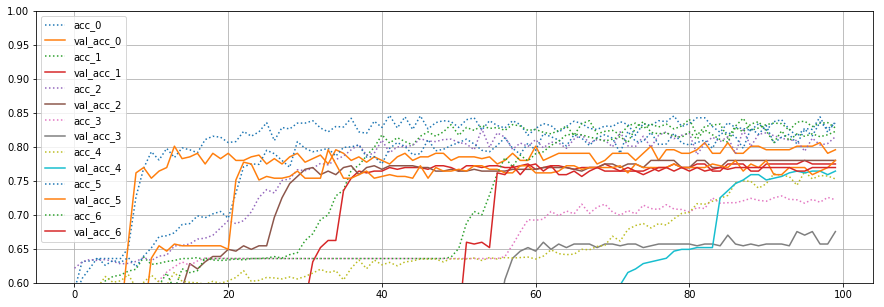

In [23]:
%matplotlib inline

show_indexes = range(0, len(dnn_classifier_settings))

if len(show_indexes) == 0:
    show_indexes = range(len(dnn_classifier_settings))

plt.figure(figsize=(15, 5))
for index in show_indexes:
    plt.plot(dnn_classifier_settings[index]['history'].history['acc'], linestyle=':', label='acc_%d' % index)
    plt.plot(dnn_classifier_settings[index]['history'].history['val_acc'], label='val_acc_%d' % index)
    
plt.ylim([0.6, 1])
# plt.xlim([0, 100])
plt.grid()
plt.legend()   

plt.show()

In [40]:
dnn_classifier = Sequential()
input_shape = (training_data.shape[1], )
dnn_classifier.add(Dense(128, activation=activation, input_shape=input_shape))
dnn_classifier.add(Dropout(rate=0.35))
dnn_classifier.add(Dense(128, activation=activation))
dnn_classifier.add(Dropout(rate=0.35))
dnn_classifier.add(Dense(64, activation=activation))
dnn_classifier.add(Dropout(rate=0.35))
dnn_classifier.add(Dense(4, activation=activation))
dnn_classifier.add(Dropout(rate=0.25))
dnn_classifier.add(Dense(2, activation=last_activation))
dnn_classifier.compile(loss='binary_crossentropy', 
                       optimizer=optimizers.RMSprop(lr=0.001000),
                       metrics=['accuracy'])
# history = dnn_classifier.fit(training_data, training_targets_one_hot,
#                              epochs=default_epochs, batch_size=default_batch_size, verbose=False, shuffle=True,
#                              validation_data=(validation_data, validation_targets_one_hot))

IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)

In [59]:
classifier = logistic_regression

training_prediction = classifier.predict(training_data)
if type(classifier) == Sequential:
    training_prediction = pd.DataFrame(training_prediction).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)

validation_prediction = classifier.predict(validation_data)
if type(classifier) == Sequential:
    validation_prediction = pd.DataFrame(validation_prediction).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)

print('Root Mean Square (training data)    : %f' % math.sqrt(metrics.mean_squared_error(training_targets, training_prediction)))
print('AUC score (training data)           : %f' % metrics.roc_auc_score(training_targets, training_prediction))
print('Accuracy score (training data)      : %f' % metrics.accuracy_score(training_targets, training_prediction))
print('')
print('Root Mean Square (validation data)  : %f' % math.sqrt(metrics.mean_squared_error(validation_targets, validation_prediction)))
print('AUC score (validation data)         : %f' % metrics.roc_auc_score(validation_targets, validation_prediction))
print('Accuracy score (validation data)    : %f' % metrics.accuracy_score(validation_targets, validation_prediction))

Root Mean Square (training data)    : 0.400000
AUC score (training data)           : 0.817228
Accuracy score (training data)      : 0.840000

Root Mean Square (validation data)  : 0.446041
AUC score (validation data)         : 0.795701
Accuracy score (validation data)    : 0.801047


# Predict Test

In [60]:
final_classifier = linear_model.LogisticRegression()

if type(final_classifier) == Sequential:
    final_classifier.fit(train_data, train_targets_one_hot, epochs=default_epochs, batch_size=default_batch_size)
else:
    final_classifier.fit(train_data, train_targets)

In [61]:
test_predictions = final_classifier.predict(test_data)
if type(final_classifier) == Sequential:
    test_predictions = pd.DataFrame(test_predictions).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)

In [62]:
import csv

with open('submission.csv', 'w') as submission_file:
    writer = csv.writer(submission_file)
    writer.writerow(['PassengerId', 'Survived'])
    for index, id in enumerate(test_id):
        writer.writerow([id, int(test_predictions[index])])

IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)